# Dimensionality Reduction Excercise
Exercise 1: Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier?

Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (p. 234). O'Reilly Media. Kindle Edition. 

In [1]:
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import time

def train_timer(model, X, y):
    t0 = time.time()
    model.fit(X, y)
    t1 = time.time()
    print(f"Time spent training: {t1-t0:.2f}")

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist['data'].copy(), mnist['target'].copy()
display(X.shape)
display(y.shape)
display(X.info())

(70000, 784)

(70000,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


None

In [5]:
y = y.astype(np.uint8)
display(y.shape)

(70000,)

In [6]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [7]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=2022)

In [8]:
train_timer(rnd_clf, X_train, y_train)

Time spent training: 68.87


In [9]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.969

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [11]:
rnd_clf_pca = RandomForestClassifier(n_estimators=100, random_state=2022)

In [12]:
train_timer(rnd_clf_pca, X_train_reduced, y_train)

Time spent training: 173.36


Training took longer than before PCA was applied.
It depends on dataset, the model and the training algorithm.

In [13]:
X_test_reduced = pca.transform(X_test)
y_pred = rnd_clf_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9489

Try to use a soft max classifier

In [15]:
#Reduced
from sklearn.linear_model import LogisticRegression

log_clf_reduced = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=2022)
train_timer(log_clf_reduced, X_train_reduced, y_train)

Time spent training: 9.31


c:\Users\ghost\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train speed is significantly faster.

In [16]:
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=2022)
train_timer(log_clf, X_train, y_train)

Time spent training: 14.25


c:\Users\ghost\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Check the accuracy on both reduced and non-reduced

In [18]:
y_pred = log_clf.predict(X_test)
print(f"Log not reduced: {accuracy_score(y_test, y_pred)}")

X_test_reduced = pca.transform(X_test)
y_pred = log_clf_reduced.predict(X_test_reduced)
print(f"Log reduced: {accuracy_score(y_test, y_pred)}")

Log not reduced: 0.9255
Log reduced: 0.9201


Conclusion: Using PCA can improve training speed but it may also depend on the model, dataset and training algorithm as seen from the cases above using RandomForestClassifier and Softmax Classifier.

Exercise 2: Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. Try using other dimensionality reduction algorithms such as PCA, LLE and MDS and compare the resulting visualizations.

Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (p. 234). O'Reilly Media. Kindle Edition. 

In [33]:
mnist['data'].index = list(mnist['data'].index)

In [34]:
mnist['target'].index = list(mnist['target'].index)


In [42]:
# Using only a subset(10000) out of the initial 60k sample to make runtime short
np.random.seed(2022)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'].iloc[idx]
y = mnist['target'].iloc[idx]


In [43]:
X.shape

(10000, 784)

In [44]:
# import t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=2022)
X_reduced = tsne.fit_transform(X)

c:\Users\ghost\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\ghost\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [51]:
y = y.astype("int")

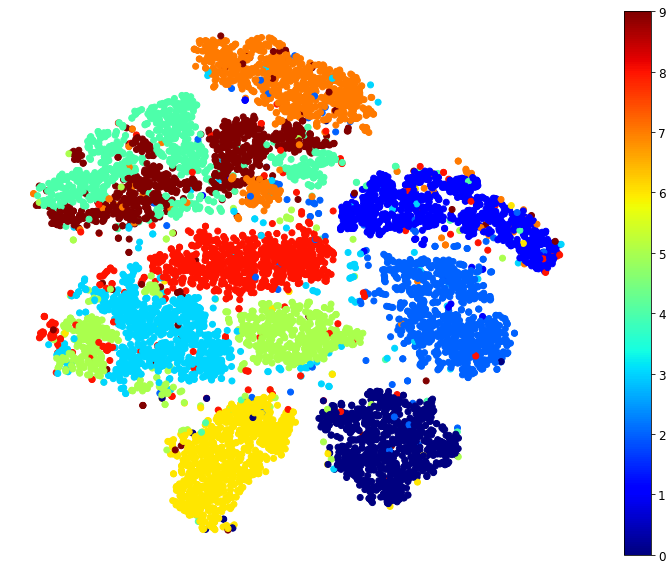

In [133]:
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

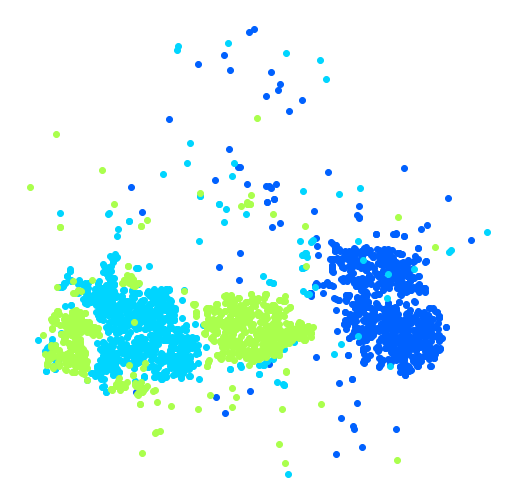

In [134]:
# Focus on 2,3 and 5 which seem look alike
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    idx = y == digit
    plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1], c=[cmap(digit/9)])
plt.axis('off')
plt.show()

Let's see if we can produce a nicer image by using t-SNE on the 3 digits

In [135]:
idx = (y == 2) | (y == 3) | (y == 5)
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

c:\Users\ghost\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\ghost\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


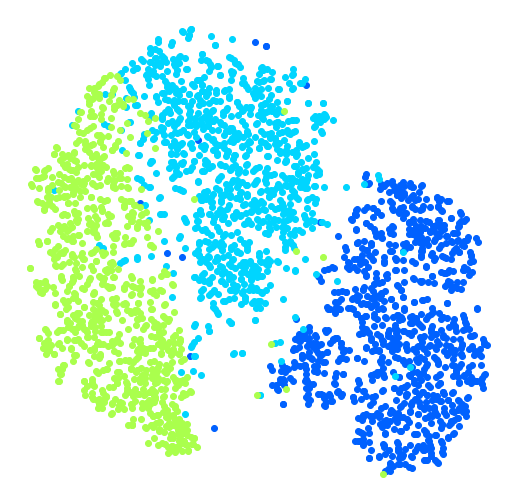

In [136]:
plt.figure(figsize=(9, 9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    idx = y_subset == digit
    plt.scatter(X_subset_reduced[idx, 0], X_subset_reduced[idx, 1], c=[cmap(digit/9)])
plt.axis('off')
plt.show()


The new plot looks nicer. There appears to be lesser overlaps and 3 and 5 looks much easier to separate than before.

Exercise 3: Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits.

Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (p. 234). O'Reilly Media. Kindle Edition. 

In [147]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Create a list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start to
    # avoid 'if' statements in the loop
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        idx = (y == digit)
        plt.scatter(X_normalized[idx, 0], X_normalized[idx, 1], c=[cmap(digit/9)])
    plt.axis("off")
    ax = plt.gcf().gca() # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(y.iloc[index]),
                         color=cmap(y.iloc[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(
                    image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)


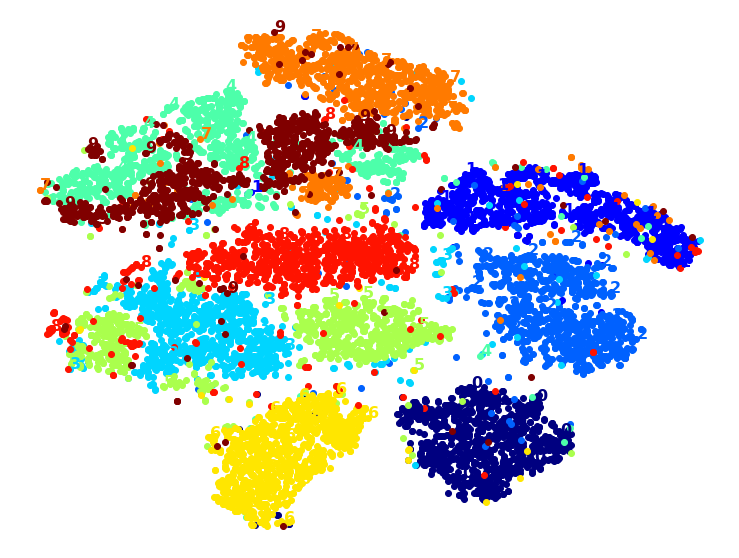

In [140]:
plot_digits(X_reduced, y)


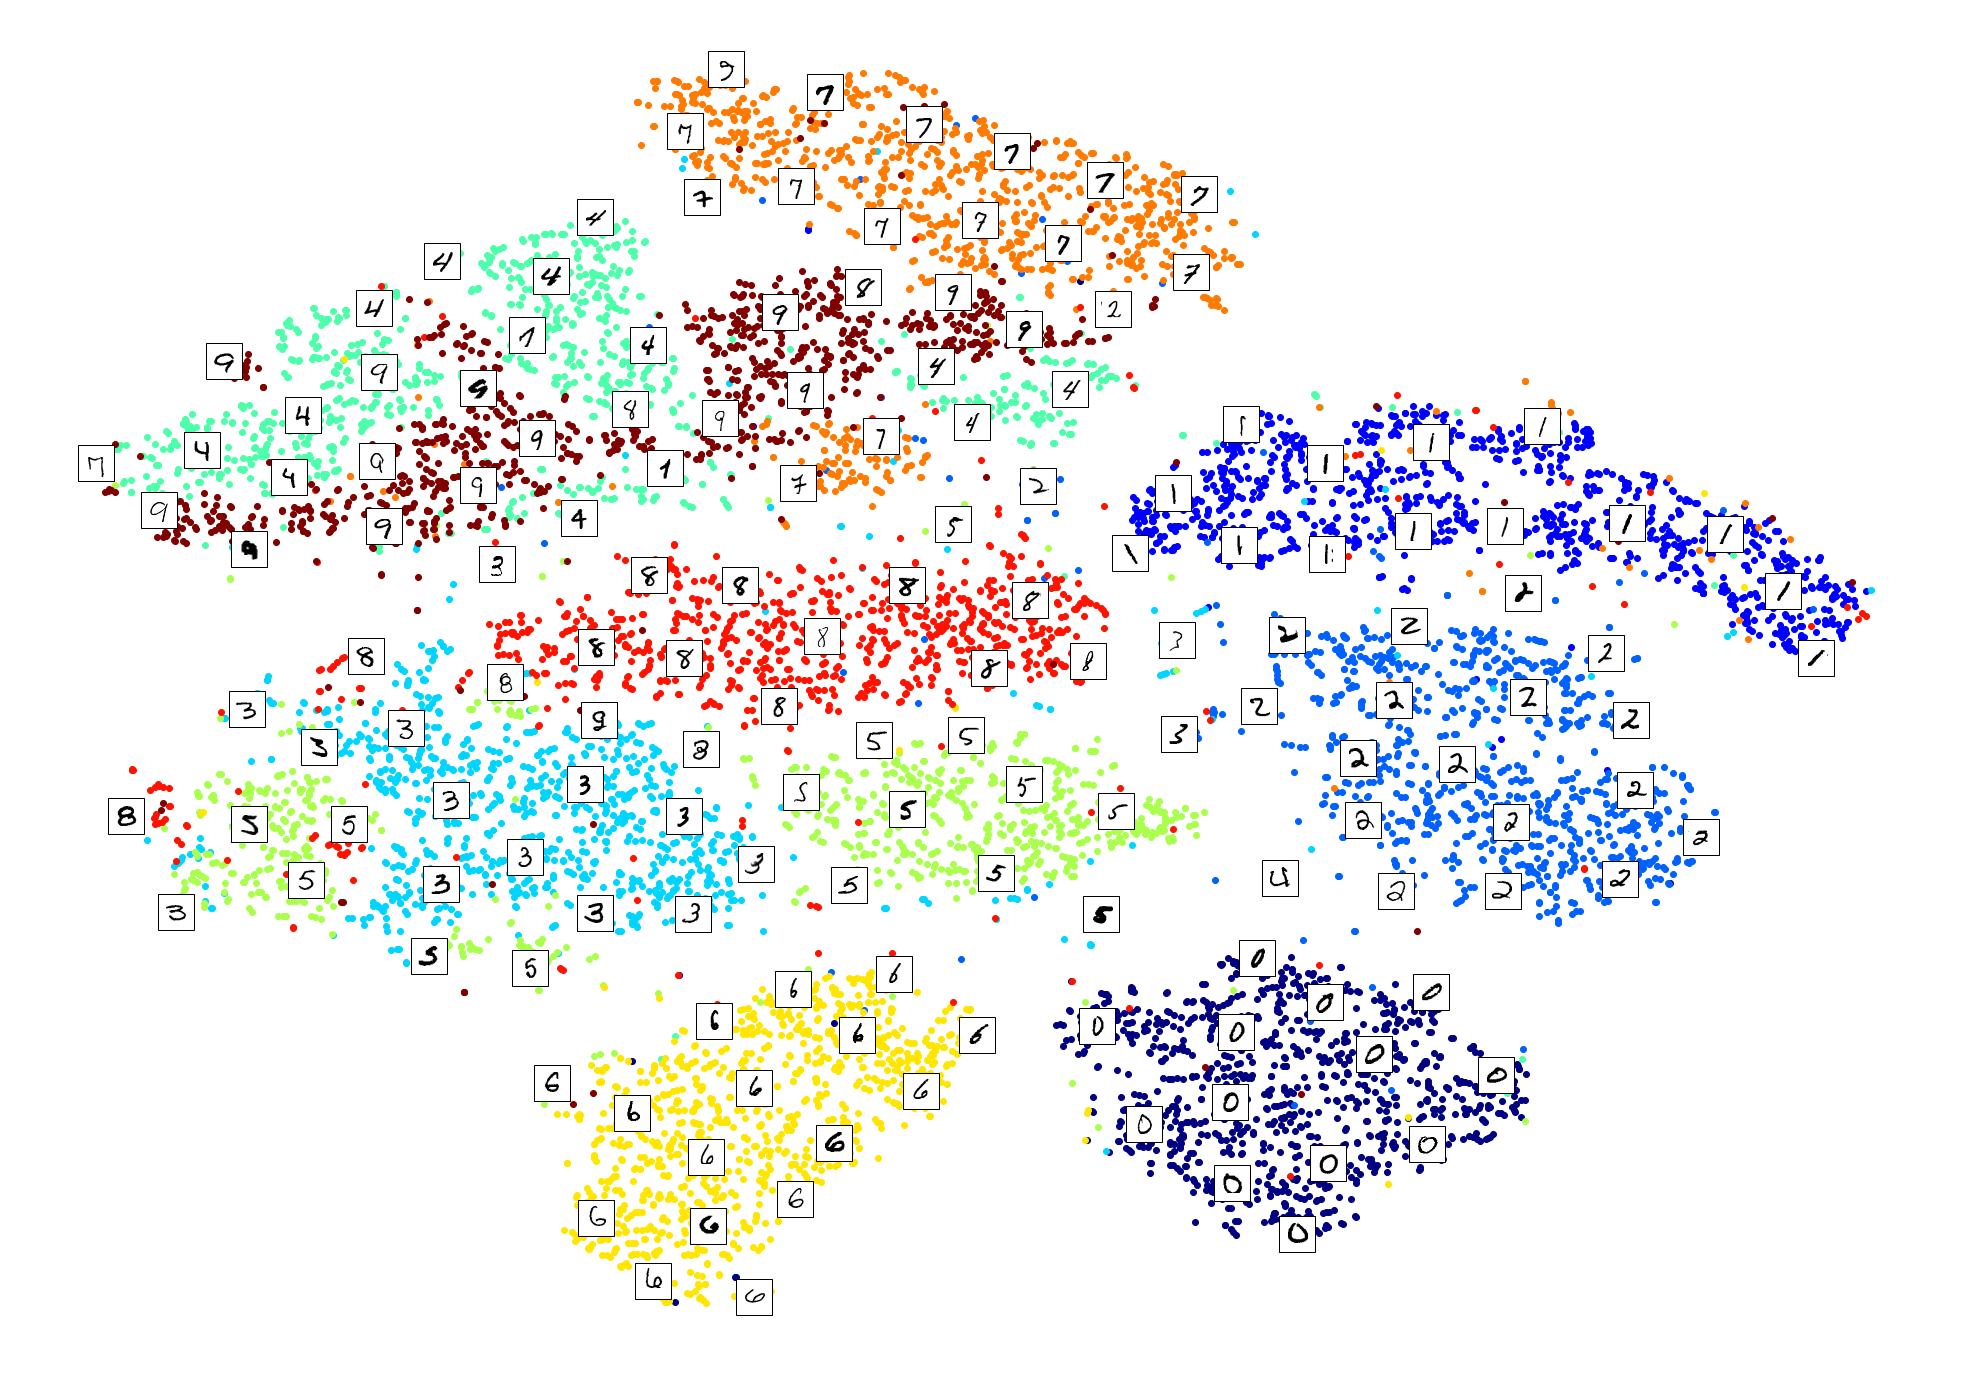

In [148]:
plot_digits(X_reduced, y, images=X.to_numpy(), figsize=(35, 25))

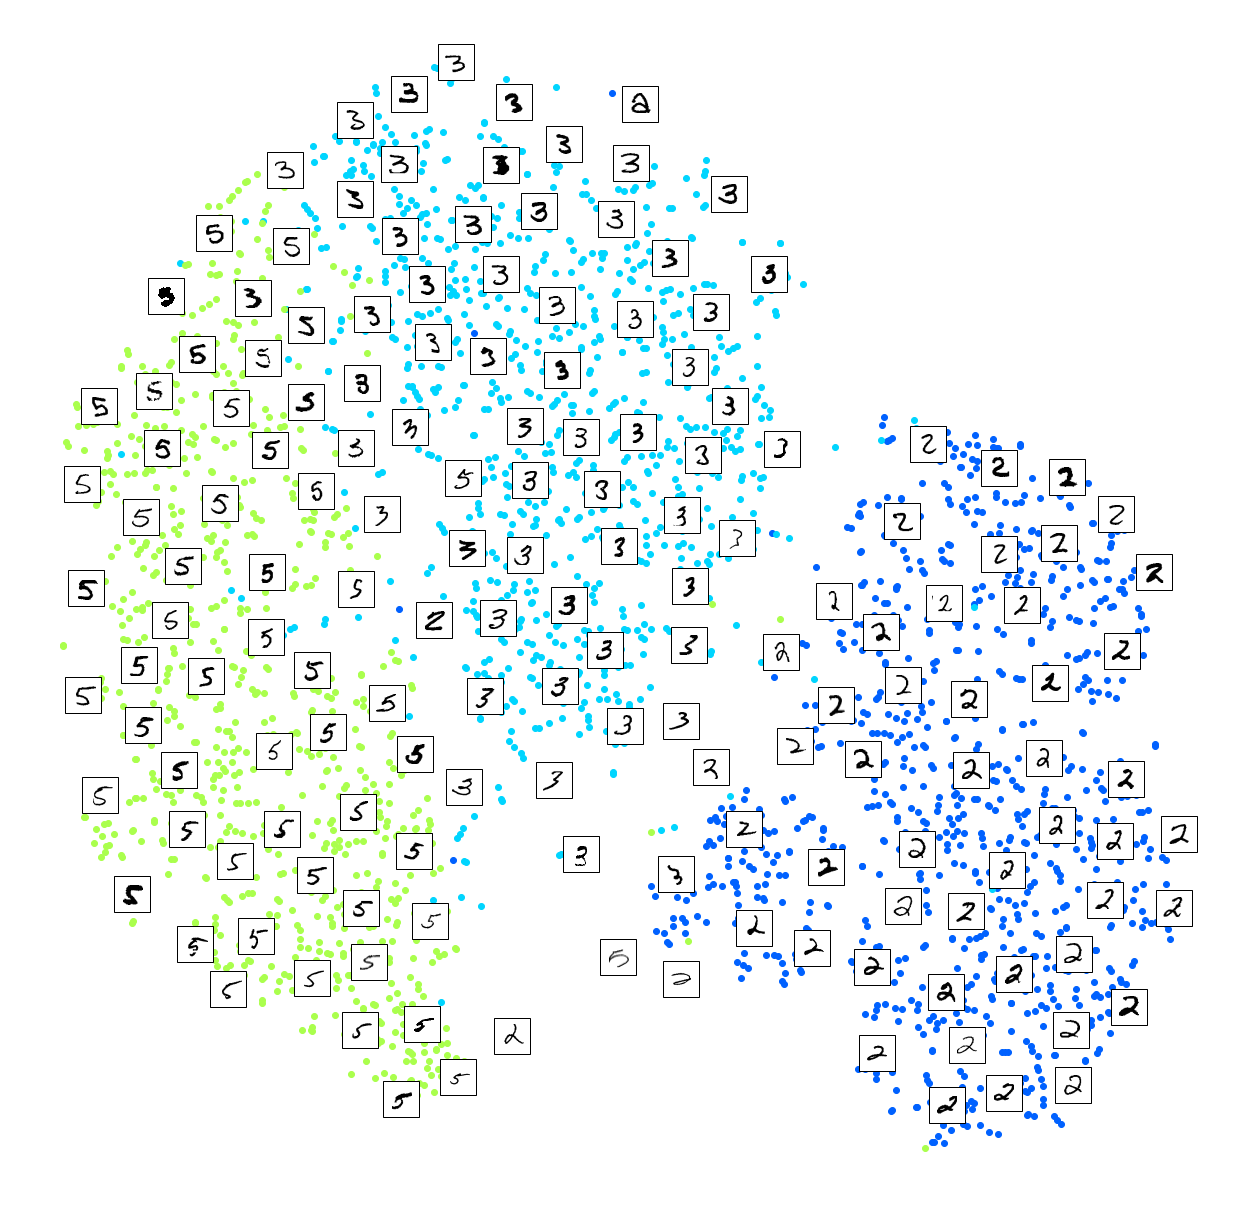

In [151]:
plot_digits(X_subset_reduced, y_subset, images=X_subset.to_numpy(), figsize=(22, 22))


Let us try PCA

PCA took 0.3s


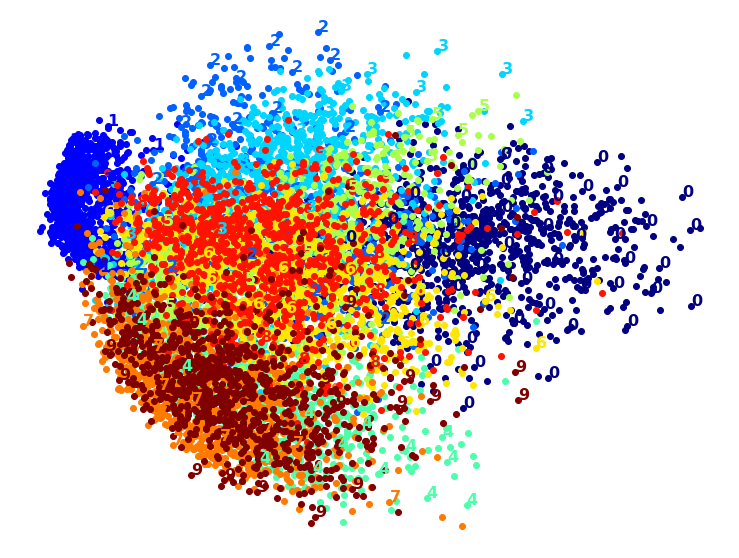

In [152]:
from scipy import rand
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=2022).fit_transform(X)
t1 = time.time()
print(f"PCA took {t1-t0:.1f}s")
plot_digits(X_pca_reduced, y)
plt.show()

PCA was very fast but there are many overlaps which may mean alot of information may  have been lost.

LLE took 29.7s


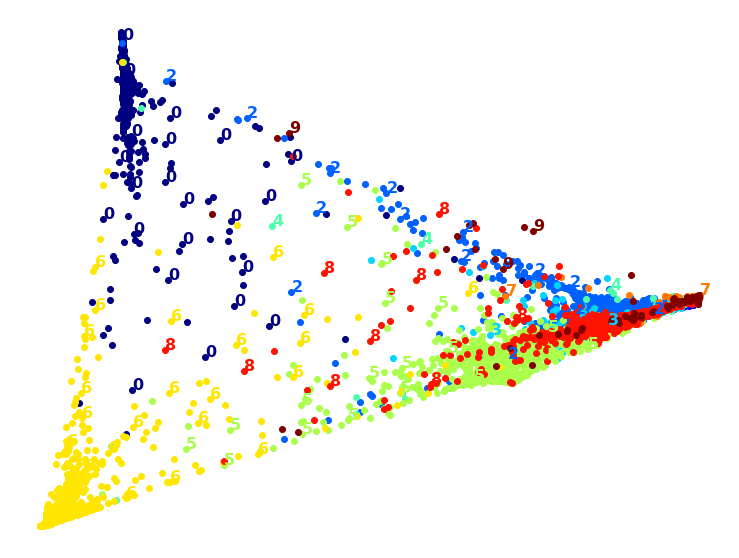

In [153]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=2022).fit_transform(X)
t1 = time.time()
print(f"LLE took {t1-t0:.1f}s")
plot_digits(X_lle_reduced, y)
plt.show()

PCA+LLE took 26.2s.


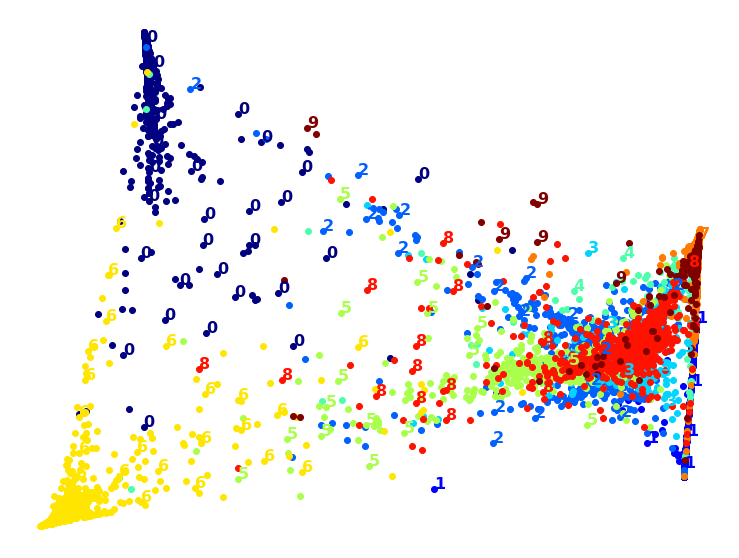

In [154]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=2022)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=2022))
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print(f"PCA+LLE took {t1-t0:.1f}s.")
plot_digits(X_pca_lle_reduced, y)
plt.show()

MDS took 101.2s (on just 2,000 MNIST images instead of 10,000).


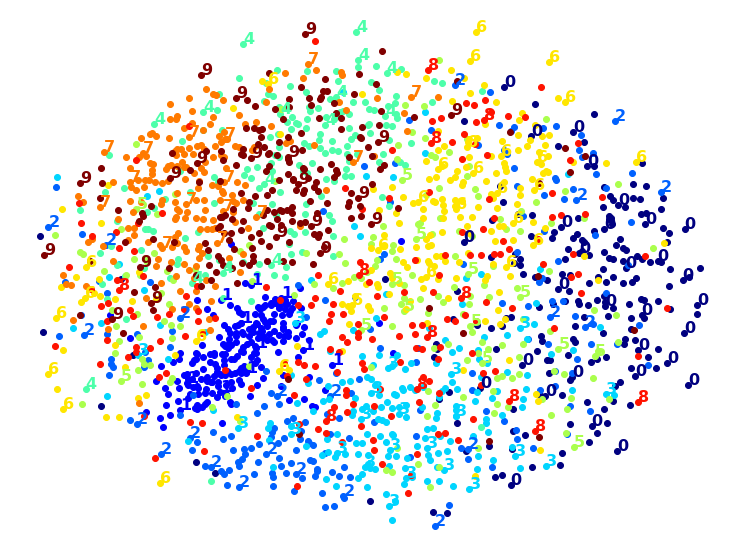

In [155]:
from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(
    t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()


MDS took 100.5s (on just 2,000 MNIST images instead of 10,000).


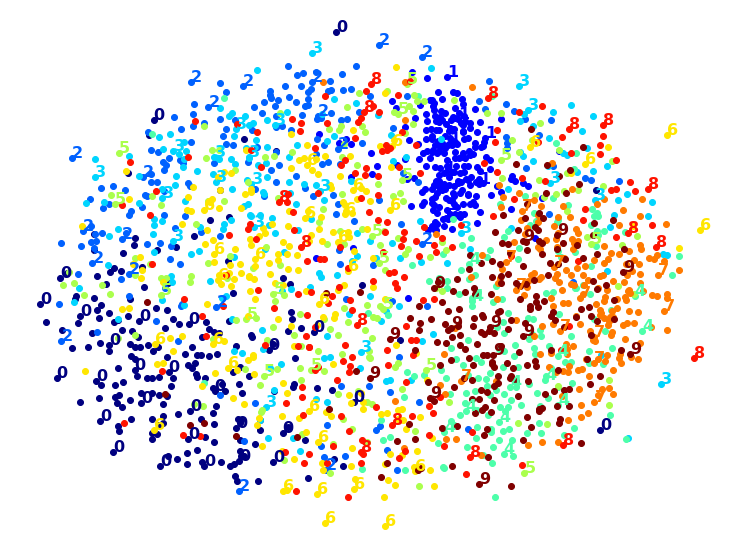

In [156]:
m = 2000

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=2022)),
    ("mds", MDS(n_components=2, random_state=2022))
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(
    t1 - t0))
plot_digits(X_pca_mds_reduced, y[:m])
plt.show()


Same result, no speedup: PCA did not help or hurt MDS in this case.

LDA took 2.8s.


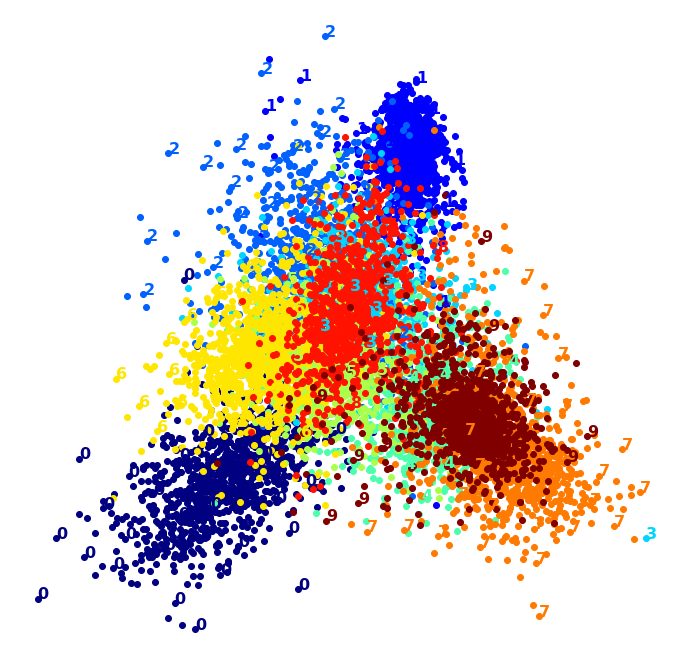

In [157]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12, 12))
plt.show()


LDA is fast but there are still lots of overlapping clusters.

c:\Users\ghost\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\ghost\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE took 35.5s.


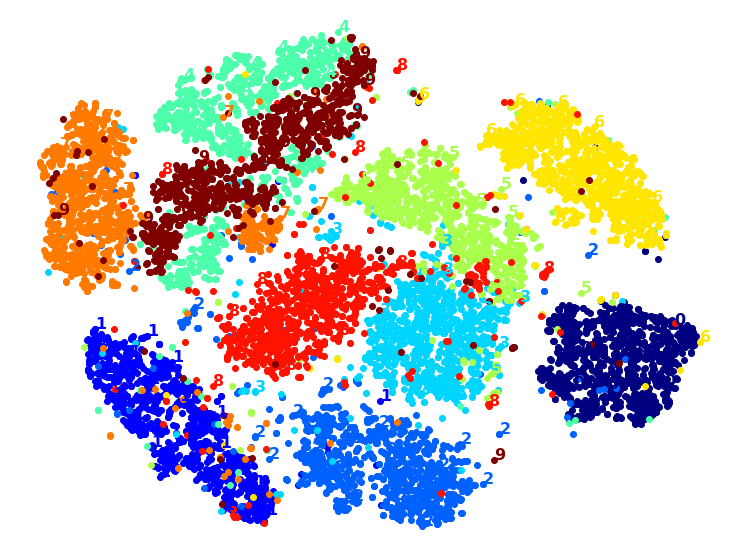

In [158]:
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y)
plt.show()


It slower that LLE but still much faster than MDS and the result looks great.

c:\Users\ghost\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\ghost\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


PCA+t-SNE took 36.3s.


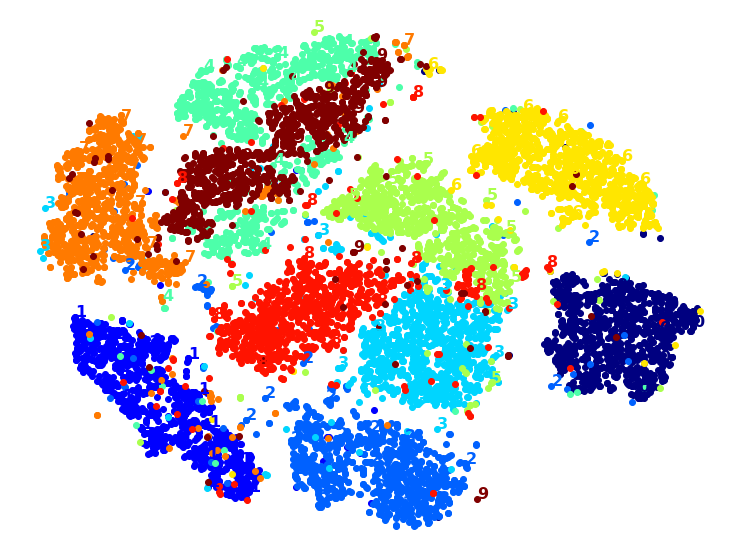

In [159]:
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()
